# Détection d'anomalie : Window Comparison Anomaly Detection

In [1]:
import saxpy.alphabet
import saxpy.sax
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import wfdb

## Importation des données

On utilise les 15000 premiers échantillons de l'enregistrement 108 de la base "<a href=https://physionet.org/content/mitdb/1.0.0/>MIT-BIH arrhythmi database"</a>. Il s'agit de signaux ECG.

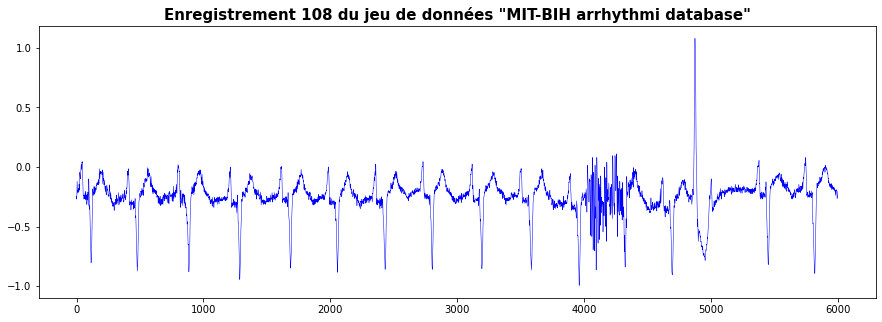

In [86]:
data = wfdb.rdrecord('data/mit-bih-arrhythmia-database-1.0.0/108')
ann = wfdb.rdann('data/mit-bih-arrhythmia-database-1.0.0/108', 'atr')

data = data.__dict__['p_signal'][6000:12000,0]

plt.figure(figsize=(15,5))
plt.plot(data,'b',linewidth = 0.5)
plt.title('Enregistrement 108 du jeu de données "MIT-BIH arrhythmi database"',fontsize = 15, fontweight = 'bold')
plt.show()

## Détection d'une anomalie

In [87]:
from saxpy.sax import sax_via_window

On commence par calculer la représentation SAX du signal.

In [88]:
win_size = 600

from time import time 
start = time()

sax = sax_via_window(data, win_size, 200, 3, "none", 0.01)
print(time()-start)

16.037480115890503


In [89]:
s = 0
for (k,v) in sax.items():
    s+=len(sax[k])

tab = [0]*s
for k in sax.keys():
    for i in sax[k]:
        tab[i] = k

On utilise ensuite cette représentation pour déterminer le plus grand score CDM dans le signal, qui correspond à l'anomalie.

In [90]:
from utils import kolmogorov_anomaly
w = kolmogorov_anomaly(tab)

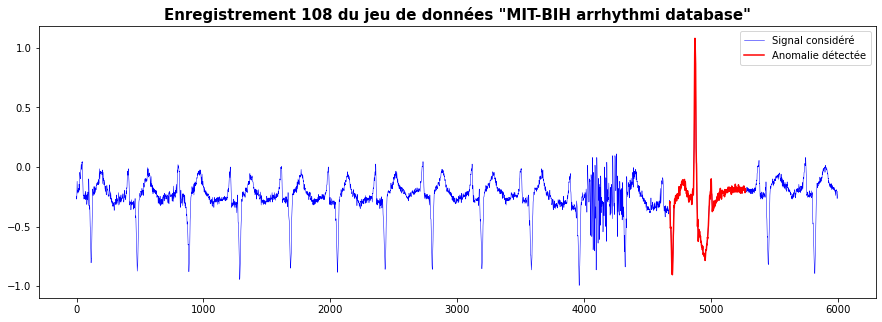

In [91]:
plt.figure(figsize=(15,5))
plt.plot(data,'b',linewidth = 0.5,label="Signal considéré")
plt.plot(np.arange(w,w+ win_size),data[w:(w+ win_size)],'r',label="Anomalie détectée")
plt.title('Enregistrement 108 du jeu de données "MIT-BIH arrhythmi database"',fontsize = 15, fontweight = 'bold')
plt.legend()
plt.show()

Recherche d'une deuxième anomalie. On commence par supprimer les symboles autour de la première anomalie avant de recalculer le plus score.

In [102]:
tab2 = tab[0:int(w-0.2*win_size)]+tab[w+int(w-0.2*win_size):]
w2 = kolmogorov_anomaly(tab2)
w2

3871

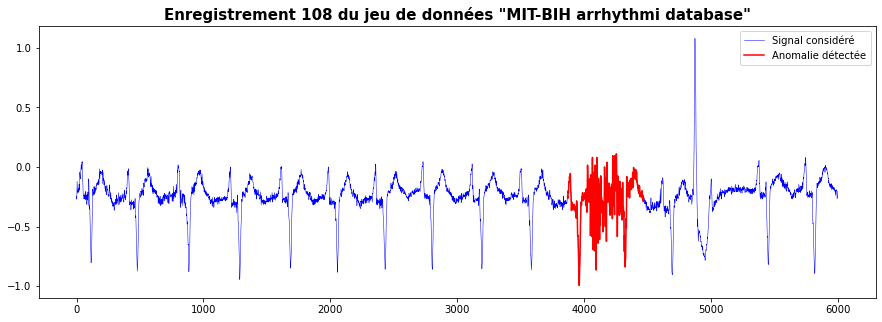

In [103]:
plt.figure(figsize=(15,5))
plt.plot(data,'b',linewidth = 0.5,label="Signal considéré")
plt.plot(np.arange(w2,w2+ win_size),data[w2:(w2+ win_size)],'r',label="Anomalie détectée")
plt.title('Enregistrement 108 du jeu de données "MIT-BIH arrhythmi database"',fontsize = 15, fontweight = 'bold')
plt.legend()
plt.show()

Illustration avec une taille de fenetre trop petite.

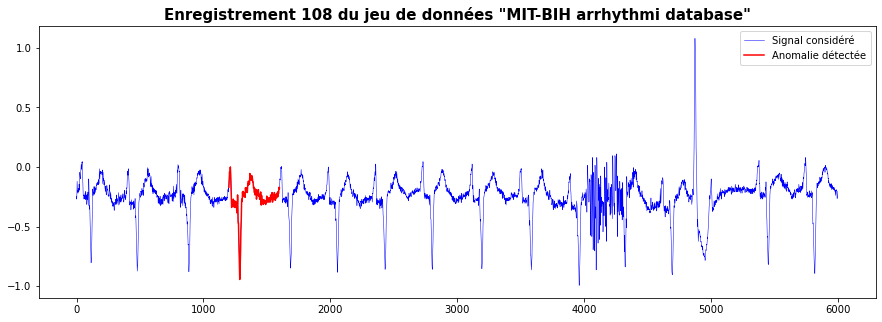

In [105]:
win_size = 600

sax = sax_via_window(data, win_size, 200, 3, "none", 0.01)
s = 0
for (k,v) in sax.items():
    s+=len(sax[k])

tab = [0]*s
for k in sax.keys():
    for i in sax[k]:
        tab[i] = k

w = kolmogorov_anomaly(tab)

plt.figure(figsize=(15,5))
plt.plot(data,'b',linewidth = 0.5,label="Signal considéré")
plt.plot(np.arange(w,w+ win_size),data[w:(w+ win_size)],'r',label="Anomalie détectée")
plt.title('Enregistrement 108 du jeu de données "MIT-BIH arrhythmi database"',fontsize = 15, fontweight = 'bold')
plt.legend()
plt.show()